In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [119]:
data = pd.read_csv("C:\\Users\\Kagero\\PycharmProjects\\codved intern\\RandomForest\\heart.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


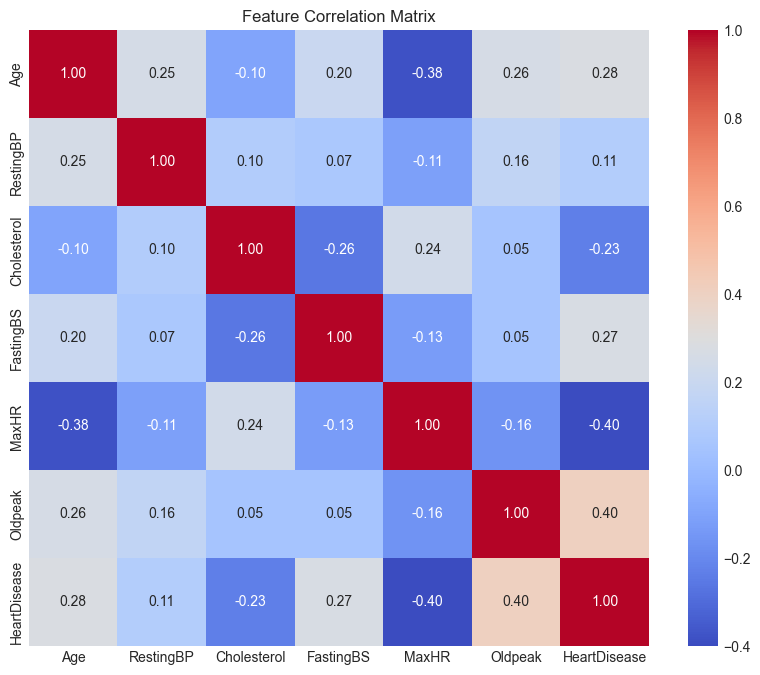

In [120]:
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

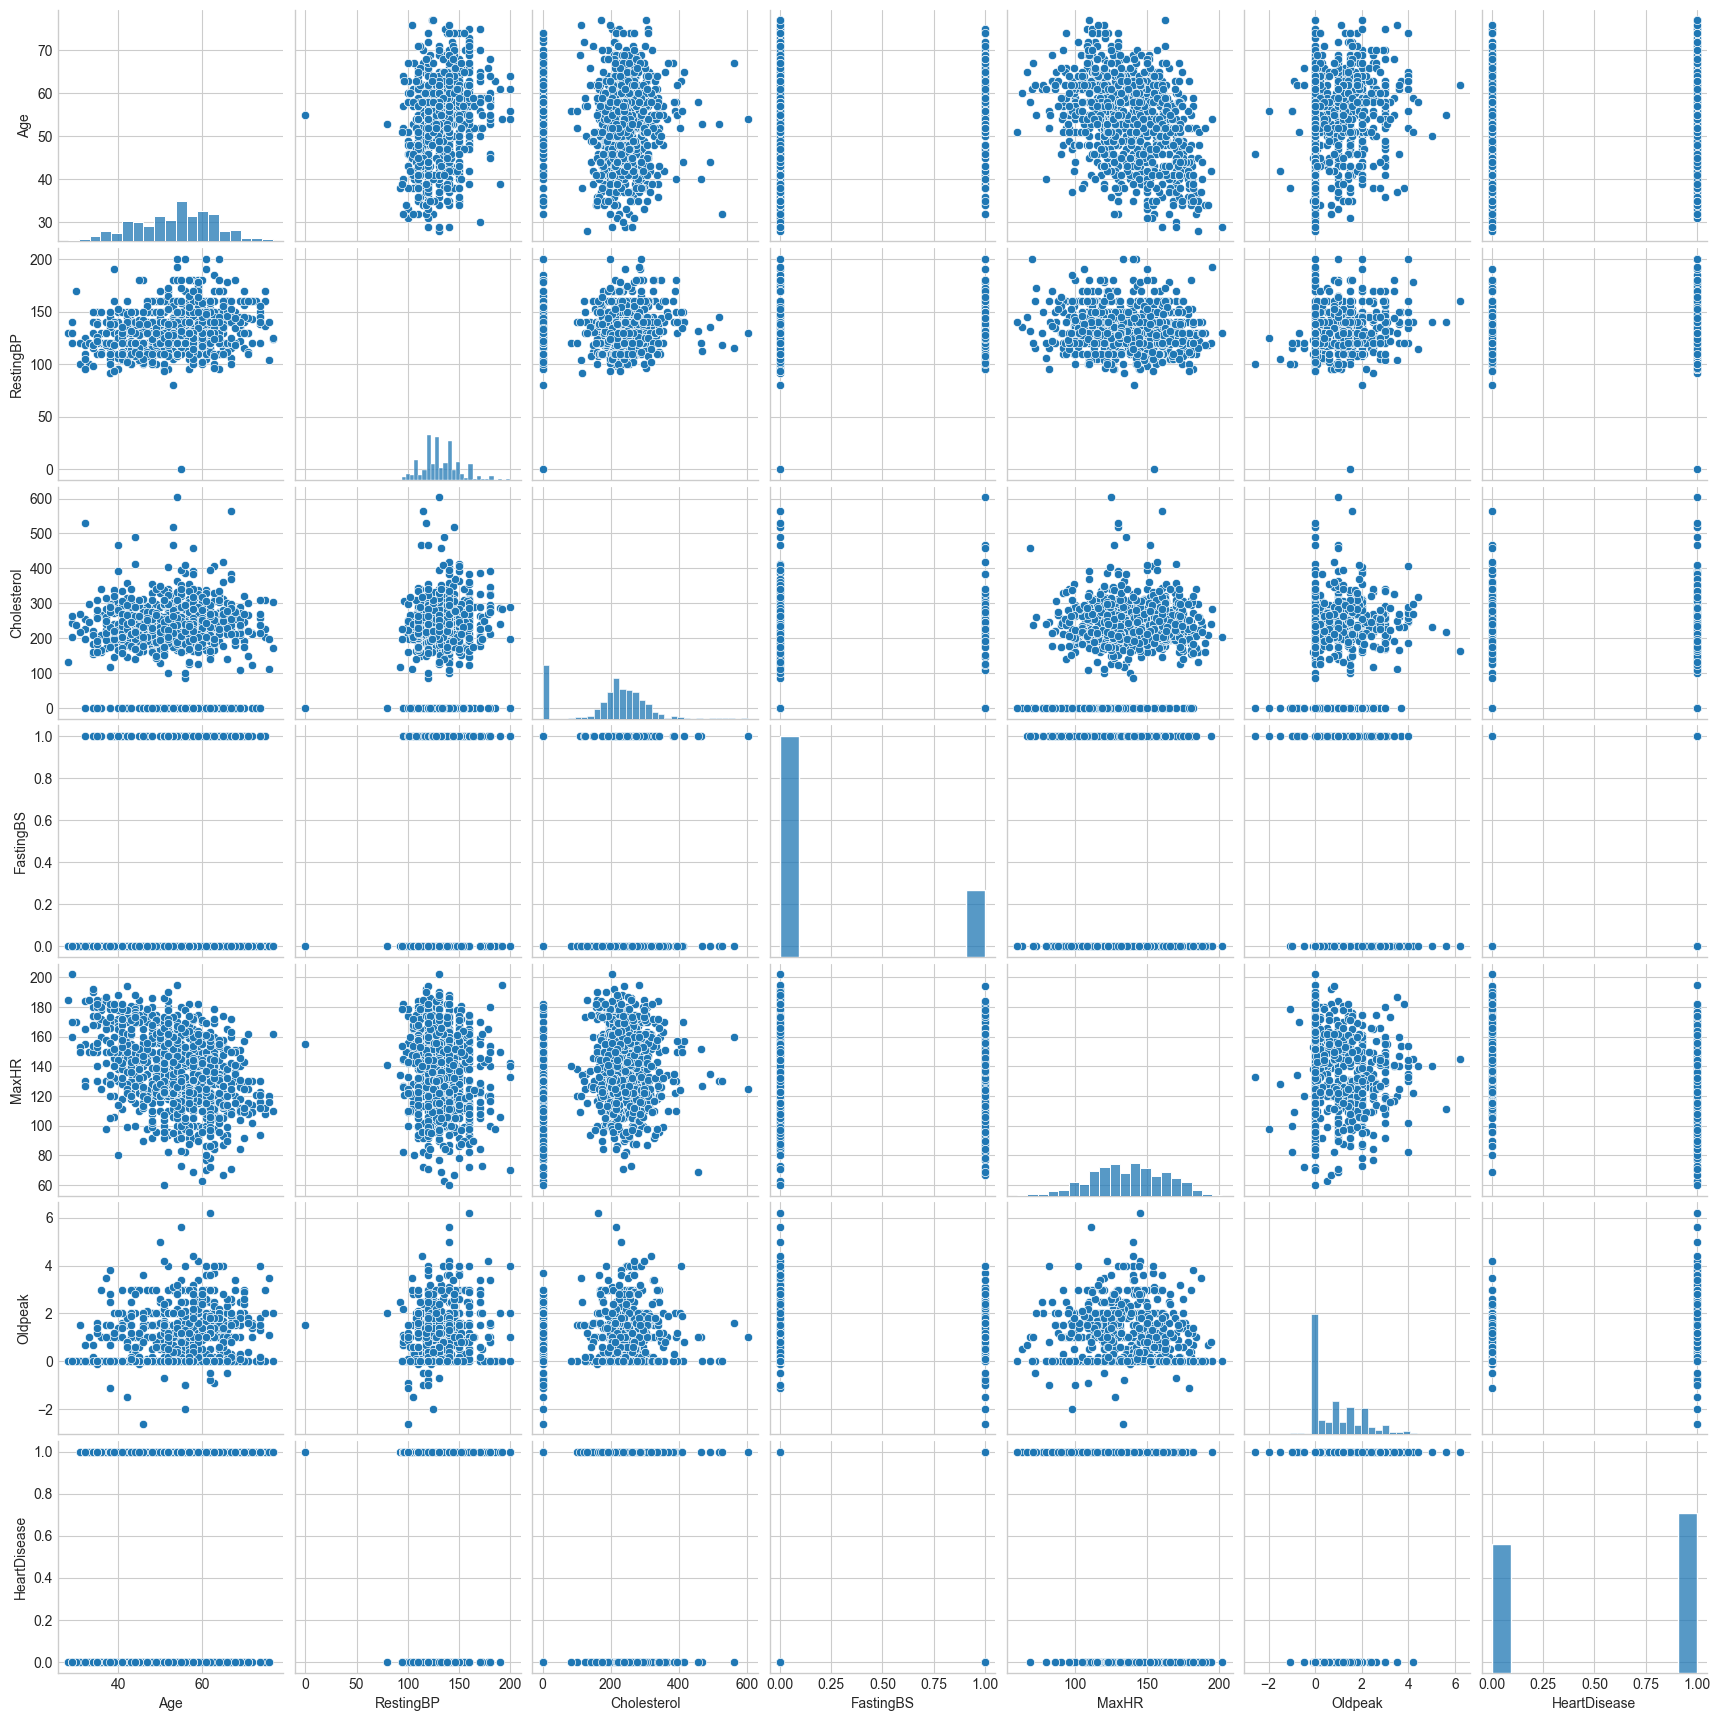

In [121]:
sns.pairplot(data)
plt.show()

In [122]:
non_numeric_cols = data.select_dtypes(exclude='number')
numeric_cols = data.select_dtypes(include='number')
feature_names = list(numeric_cols.columns)
feature_names.pop()
print(feature_names)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


In [123]:
X = np.array(numeric_cols)[:, 0:6]
Y = np.array(data.iloc[:, 11])
print(X.shape, Y.shape)

(918, 6) (918,)


In [124]:
def k_folds(X_len, n_splits):
    np.random.seed(42)
    shuffled = np.random.permutation(X_len)
    folds = np.array_split(shuffled, n_splits)
    return folds

In [125]:
folds = k_folds(len(X), 6)
print(len(folds), len(folds[0]))

6 153


In [126]:
def cross_validate(folds, X, Y):
    test_accuracies = []
    pgbr = tqdm(range(len(folds)), desc='Cross Validation', leave=False,
                ncols=100)
    for i in pgbr:
        test = folds.pop(i)
        train = np.array(folds)
        X_train = np.array(X[train]).reshape(-1, 6)
        Y_train = np.array(Y[train]).reshape(-1)
        X_test = X[test]
        Y_test = Y[test]
        folds.insert(i, test)
        randomForest = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42,min_samples_leaf=5,min_samples_split=5)
        randomForest.fit(X_train, Y_train)
        y_pred = randomForest.predict(X_test)
        test_accuracies.append(classification_report(Y_test, y_pred))
        pgbr.set_postfix({'Fold': i + 1})
    return test_accuracies


In [127]:
accuracies = cross_validate(folds, X, Y)

Cross Validation:   0%|                                                       | 0/6 [00:00<?, ?it/s]

In [128]:
for i in accuracies:
    print(f"Fold {accuracies.index(i)+1} test results \n",i)

Fold 1 test results 
               precision    recall  f1-score   support

           0       0.67      0.70      0.68        63
           1       0.78      0.76      0.77        90

    accuracy                           0.73       153
   macro avg       0.72      0.73      0.73       153
weighted avg       0.73      0.73      0.73       153

Fold 2 test results 
               precision    recall  f1-score   support

           0       0.78      0.77      0.78        61
           1       0.85      0.86      0.85        92

    accuracy                           0.82       153
   macro avg       0.82      0.81      0.82       153
weighted avg       0.82      0.82      0.82       153

Fold 3 test results 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        70
           1       0.88      0.83      0.86        83

    accuracy                           0.85       153
   macro avg       0.85      0.85      0.85       153
weighted

In [129]:
test = folds.pop(2)
train = np.array(folds)
X_train = np.array(X[train]).reshape(-1, 6)
Y_train = np.array(Y[train]).reshape(-1)
X_test = X[test]
Y_test = Y[test]

In [130]:
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42,min_samples_leaf=5,min_samples_split=5)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        70
           1       0.88      0.83      0.86        83

    accuracy                           0.85       153
   macro avg       0.85      0.85      0.85       153
weighted avg       0.85      0.85      0.85       153



Displaying plot for Mean Decrease in Impurity...


C:\Users\Kagero\AppData\Local\Temp\ipykernel_22184\1085192783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, ax=ax1, palette='viridis')


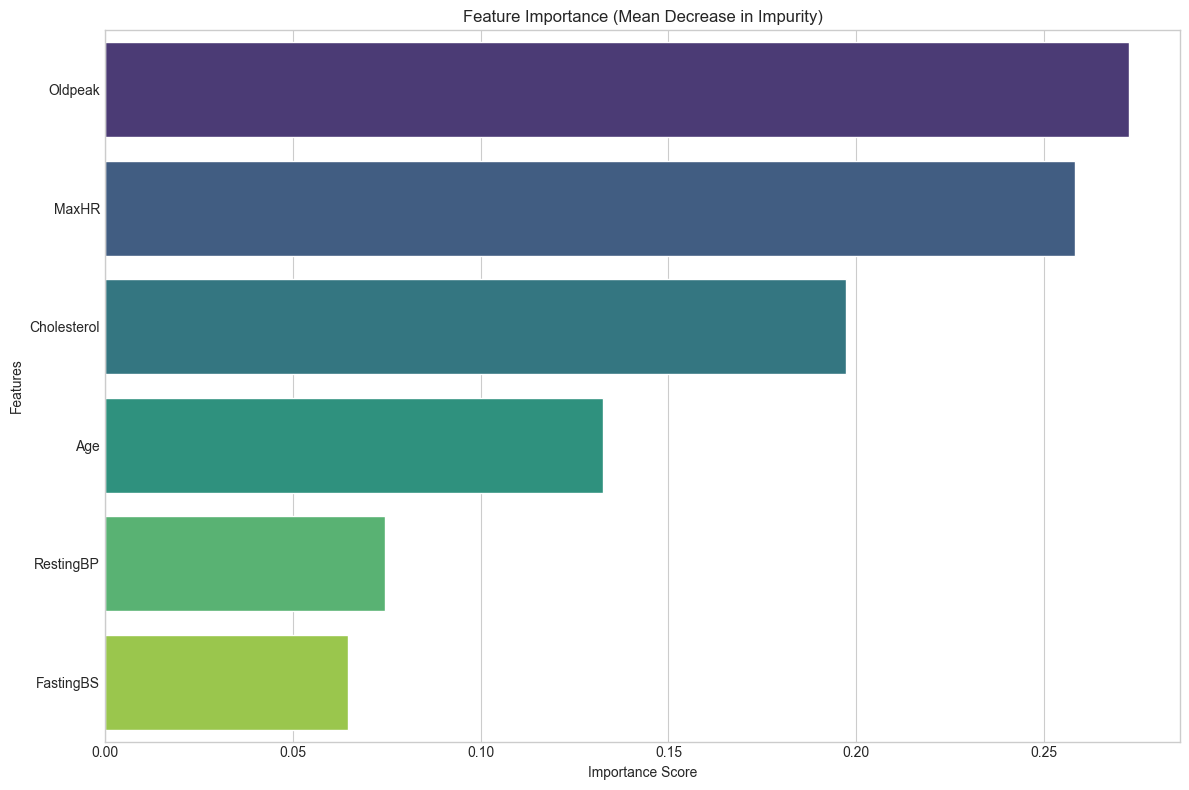

In [131]:
importances = clf.feature_importances_
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.style.use('seaborn-v0_8-whitegrid')
fig1, ax1 = plt.subplots(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_importance.index, ax=ax1, palette='viridis')
ax1.set_title('Feature Importance (Mean Decrease in Impurity)')
ax1.set_xlabel('Importance Score')
ax1.set_ylabel('Features')
plt.tight_layout()
print("Displaying plot for Mean Decrease in Impurity...")
plt.show() 